# Pointwise Evaluation

In this notebook, pointwise algorithms can be evaluated.
To start an experiment, define it using the following parameters:

<b>name</b>: Name of the experiment <br>
<b>model</b>: The model to use (Possible choices are nbg, lr, svm, dt, rf, ada, gb) <br>
<b>pca</b>: PCA components for dimensionality reduction (None with 0) <br>
<b>search_space</b>: Values to use in bayesian optimization (Optional) <br>
<b>trials</b>: Number of hyperparameter optimization trials (Optional)

### Imports

In [1]:
import os
import sys
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical
sys.path.append(os.path.dirname((os.path.abspath(""))))

In [2]:
from src.pipeline import Pipeline

[nltk_data] Downloading package punkt to /Users/tim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/tim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/tim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tim/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
pipeline = Pipeline(
    collection='data/processed/30_5000_1000_collection.pkl',
    queries='data/processed/30_5000_1000_queries.pkl',
    queries_val='data/processed/30_5000_1000_queries_val.pkl',
    queries_test='data/processed/30_5000_1000_queries_test.pkl',
    features='data/processed/30_5000_1000_features.pkl',
    qrels_val='data/processed/30_5000_1000_qrels_val.pkl',
    qrels_test='data/processed/30_5000_1000_qrels_test.pkl',
    features_test='data/processed/30_5000_1000_features_test.pkl',
    features_val='data/processed/30_5000_1000_features_val.pkl',
)

<b>!</b> Run the next line only for feature selection

In [8]:
feature_selection_result = ['bert_cosine', 'bm25', 'char_query', 'tfidf_manhattan', 'w2v_tfidf_manhattan', 'words_difference', 'query_nouns', 'query_adjectives', 'jaccard', 'w2v_cosine', 'query_verbs', 'doc_nouns', 'polarity_doc', 'words_rel_difference']
pipeline.features = pipeline.features[['qID', 'pID', 'y'] + feature_selection_result]
pipeline.features_test = pipeline.features_test[['qID', 'pID'] + feature_selection_result]
pipeline.features_val = pipeline.features_val[['qID', 'pID'] + feature_selection_result]

In [4]:
pipeline.features

,qID,pID,y,w2v_cosine,w2v_euclidean,w2v_manhattan,w2v_tfidf_cosine,w2v_tfidf_euclidean,w2v_tfidf_manhattan,tfidf_cosine,...,polarity_doc,subjectivity_query,polarity_query,bm25,doc_nouns,doc_adjectives,doc_verbs,query_nouns,query_adjectives,query_verbs
0,603195,7050012,1,0.972107,144.641830,1124.871630,0.938781,2.765727,22.236694,0.537439,...,0.000000,0.00,0.00,-24.655536,23,6,4,3,1,1
1,474183,325505,1,0.971866,131.960266,1033.670312,0.985675,1.360485,11.347487,0.745907,...,0.450000,0.00,0.00,-33.129796,18,9,3,4,0,0
2,320545,1751825,1,0.947701,94.900002,756.378183,0.959522,2.236971,17.352688,0.409509,...,0.500000,0.20,0.20,-16.699603,20,2,14,2,1,1
3,89798,5069949,1,0.972710,161.470459,1273.643564,0.933304,1.714253,13.493497,0.541627,...,0.066667,0.25,0.00,-27.678576,25,10,5,3,1,0
4,1054603,2869106,1,0.965680,155.648453,1216.564726,0.941391,1.799412,14.369308,0.438115,...,0.000000,0.00,0.00,-28.497519,20,9,6,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,128401,6127598,0,0.796978,85.670822,678.466760,0.555981,3.027138,24.841764,0.185056,...,-0.520833,0.00,0.00,-8.866170,16,6,13,2,1,0
4996,1044540,4616118,0,0.922095,157.044754,1238.354322,0.603788,2.167866,17.812756,0.140057,...,0.156250,0.00,0.00,-7.852468,25,9,16,0,0,1
4997,486146,1137390,0,0.946438,125.126984,972.330644,0.882998,4.161341,34.815641,0.314505,...,-0.100000,0.10,0.00,-15.909103,12,1,10,2,0,2
4998,532697,5161847,0,0.938939,99.808395,790.453814,0.893834,1.977307,16.122506,0.344173,...,0.284375,0.00,0.00,-16.617979,18,8,9,3,1,0


### Logistic Regression

In [5]:
pipeline.evaluate(
    model='lr', 
    pca=0
)

/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MRR: 0.7100000000000001
nDCG: 0.8594455416010075


##### With Hyperparameter Optimization

In [6]:
logistic_regression_search_space: list = []
logistic_regression_search_space.append(Categorical(['l2', 'none'], name='penalty'))
logistic_regression_search_space.append(Real(0.1, 100.0, 'log-uniform', name='C'))
logistic_regression_search_space.append(Real(1e-6, 0.1, name='tol'))

In [ ]:
pipeline.evaluate(
    name='hpo',
    model='lr', 
    pca=0, 
    search_space=logistic_regression_search_space,
    trials=80
)

/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (m

/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval

/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (m

/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (m

/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (m

/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (m

/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

### Naive Bayes

In [5]:
pipeline.evaluate(
    model='nbg', 
    pca=0
)

MRR: 0.7831890331890332


### Multi-layer Perceptron

In [6]:
pipeline.evaluate(
    model='mlp', 
    pca=0
)

/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MRR: 0.6127128427128427


##### With Hyperparameter Optimization

In [22]:
mlp_search_space: list = []
mlp_search_space.append(Categorical(['identity', 'logistic', 'tanh', 'relu'], name='activation'))
mlp_search_space.append(Real(1e-6, 0.1, name='alpha'))
mlp_search_space.append(Real(1e-6, 0.1, name='learning_rate_init'))

In [23]:
pipeline.evaluate(
    name='hpo',
    model='mlp', 
    pca=0,
    search_space=mlp_search_space,
    trials=80
)

/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best MRR: 0.021389911903328847
Best Hyperparameters: ['relu', 0.06182287613368023, 0.088131546212749]
MRR on test set: 0.04008374381599637


### Support Vector Machine

In [11]:
pipeline.evaluate(
    name='default_fs',
    model='svm', 
    pca=0
)

MRR: 0.03290961769836377


##### With Hyperparameter Optimization

In [18]:
svm_search_space: list = []
svm_search_space.append(Categorical(['poly', 'rbf', 'sigmoid'], name='kernel'))
svm_search_space.append(Real(0.1, 100.0, name='C'))

In [19]:
pipeline.evaluate(
    name='hpo',
    model='svm', 
    pca=0,
    search_space=svm_search_space,
    trials=10
)

Best MRR: 0.006591189472904975
Best Hyperparameters: ['poly', 96.43409248718199]
MRR on test set: 0.02065391377002617


### Decision Tree

In [7]:
pipeline.evaluate(
    name='default_fs',
    model='dt', 
    pca=0
)

MRR: 0.48315889840418147


##### With Hyperparameter Optimization

In [24]:
decision_tree_search_space: list = []
decision_tree_search_space.append(Categorical(['gini', 'entropy'], name='criterion'))
decision_tree_search_space.append(Integer(2, 15, name='min_samples_split'))
decision_tree_search_space.append(Integer(1, 10, name='min_samples_leaf'))
decision_tree_search_space.append(Integer(5, 100, name='max_leaf_nodes'))
decision_tree_search_space.append(Integer(10, 50, name='max_depth'))
decision_tree_search_space.append(Real(0.0, 0.2, name='min_weight_fraction_leaf'))

In [27]:
pipeline.evaluate(
    name='hpo',
    model='dt', 
    pca=0,
    search_space=decision_tree_search_space,
    trials=80
)

Best MRR: 0.014240579043972797
Best Hyperparameters: ['gini', 8, 1, 54, 50, 0.09589400710794578]
MRR on test set: 0.031025164291920405


### Random Forest

In [13]:
pipeline.evaluate(
    name='default_fs',
    model='rf', 
    pca=0
)

MRR: 0.01848330416627482


##### With Hyperparameter Optimization

In [31]:
random_forest_search_space: list = []
random_forest_search_space.append(Integer(20, 200, name='n_estimators'))
random_forest_search_space.append(Categorical(['gini', 'entropy'], name='criterion'))
random_forest_search_space.append(Integer(2, 15, name='min_samples_split'))
random_forest_search_space.append(Integer(1, 10, name='min_samples_leaf'))
random_forest_search_space.append(Integer(5, 100, name='max_leaf_nodes'))
random_forest_search_space.append(Integer(10, 50, name='max_depth'))
random_forest_search_space.append(Real(0.0, 0.2, name='min_weight_fraction_leaf'))

In [32]:
pipeline.evaluate(
    name='hpo',
    model='rf', 
    pca=0,
    search_space=random_forest_search_space,
    trials=80
)

Best MRR: 0.009150207701567426
Best Hyperparameters: [154, 'gini', 2, 5, 80, 14, 0.0403058426545757]
MRR on test set: 0.034692053937964124


### Adaptive Boosting

In [36]:
pipeline.evaluate(
    name='default_fs',
    model='ada', 
    pca=0
)

MRR: 0.03280269179184586


##### With Hyperparameter Optimization

In [37]:
ada_boost_search_space: list = []
ada_boost_search_space.append(Integer(20, 200, name='n_estimators'))
ada_boost_search_space.append(Real(1e-2, 2.0, name='learning_rate'))

In [38]:
pipeline.evaluate(
    name='hpo',
    model='ada', 
    pca=0,
    search_space=ada_boost_search_space,
    trials=80
)

Best MRR: 0.01287661935132817
Best Hyperparameters: [196, 1.8682883991749144]
MRR on test set: 0.02859756118744077


### Gradient Boosting

In [15]:
pipeline.evaluate(
    name='default_fs',
    model='gb', 
    pca=0
)

MRR: 0.019908559703379892


##### With Hyperparameter Optimization

In [ ]:
gradient_boosting_search_space: list = []
gradient_boosting_search_space.append(Integer(20, 200, name='n_estimators'))
gradient_boosting_search_space.append(Categorical(['friedman_mse', 'squared_error', 'mse'], name='criterion'))
gradient_boosting_search_space.append(Integer(2, 15, name='min_samples_split'))
gradient_boosting_search_space.append(Integer(1, 10, name='min_samples_leaf'))
gradient_boosting_search_space.append(Integer(5, 100, name='max_leaf_nodes'))
gradient_boosting_search_space.append(Integer(10, 50, name='max_depth'))
gradient_boosting_search_space.append(Real(0.0, 0.2, name='min_weight_fraction_leaf'))

In [ ]:
pipeline.evaluate(
    name='hpo',
    model='gb', 
    pca=0,
    search_space=gradient_boosting_search_space,
    trials=80
)

### Results

In [5]:
import pandas as pd
from src.utils.utils import load

results = load('data/results/results.pkl')
results

,name,model,hyperparameters,pairwise_model,pairwise_k,features,sampling_training,sampling_test,pca,MRR,MAP,nDCG,accuracy,precision,recall,f1,accuracy@50,precision@50,recall@50,f1@50
0,None,LogisticRegression(),"{'C': 1.0, 'class_weight': None, 'dual': False...",None,None,"[""w2v_cosine""]",9977,451680,0,0.000388,0.213607,0.466847,0.880017,0.020470,0.633635,0.039658,0.243333,0.243333,1.000000,0.391421
1,None,LogisticRegression(),"{'C': 1.0, 'class_weight': None, 'dual': False...",None,None,"[""w2v_euclidean""]",9977,451680,0,0.000071,0.012244,0.245864,0.728835,0.004897,0.338052,0.009654,0.018667,0.018667,1.000000,0.036649
2,None,LogisticRegression(),"{'C': 1.0, 'class_weight': None, 'dual': False...",None,None,"[""w2v_manhattan""]",9977,451680,0,0.000071,0.011349,0.245556,0.742402,0.004917,0.322197,0.009686,0.016667,0.016667,1.000000,0.032787
3,None,LogisticRegression(),"{'C': 1.0, 'class_weight': None, 'dual': False...",None,None,"[""w2v_tfidf_cosine""]",9977,451680,0,0.001565,0.454008,0.605277,0.980648,0.126086,0.665912,0.212026,0.433333,0.433333,1.000000,0.604651
4,None,LogisticRegression(),"{'C': 1.0, 'class_weight': None, 'dual': False...",None,None,"[""w2v_tfidf_euclidean""]",9977,451680,0,0.001216,0.427975,0.594469,0.960346,0.022986,0.220272,0.041629,0.358667,0.311060,0.425868,0.359521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,None,MLPClassifier(random_state=42),"{'activation': 'relu', 'alpha': 0.0001, 'batch...",None,None,"[""w2v_cosine"", ""w2v_euclidean"", ""w2v_manhattan...",9977,451680,0,NaN,0.559354,0.734080,0.996413,0.574642,0.318233,0.409621,0.676667,0.610231,0.752252,0.673840
502,default_fs,DecisionTreeClassifier(random_state=42),"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",None,None,"[""w2v_cosine"", ""w2v_euclidean"", ""w2v_manhattan...",9977,451680,0,NaN,0.327402,0.574378,0.996838,0.707617,0.326161,0.446512,0.848000,0.698539,0.998102,0.821875
503,None,LogisticRegression(random_state=42),"{'C': 1.0, 'class_weight': None, 'dual': False...",None,None,"[""bm25"", ""char_query"", ""tfidf_manhattan"", ""w2v...",9977,451680,0,NaN,0.812780,0.817026,0.996285,1.000000,0.049830,0.094930,0.484000,1.000000,0.102088,0.185263
504,None,LogisticRegression(random_state=42),"{'C': 1.0, 'class_weight': None, 'dual': False...",None,None,"[""bm25"", ""char_query"", ""tfidf_manhattan"", ""w2v...",9977,451680,0,NaN,0.812780,0.817026,0.996285,1.000000,0.049830,0.094930,0.484000,1.000000,0.102088,0.185263


##### Default Settings

In [15]:
results[results['name'] == 'default']

,name,model,hyperparameters,pairwise_model,pairwise_k,features,sampling_training,sampling_test,pca,MRR,MAP,nDCG,accuracy,precision,recall,f1,accuracy@50,precision@50,recall@50,f1@50
432,default,LogisticRegression(random_state=42),"{'C': 1.0, 'class_weight': None, 'dual': False...",None,None,"[""w2v_cosine"", ""w2v_euclidean"", ""w2v_manhattan...",9977,451680,0,0.038060,0.865090,0.859446,0.997135,0.993724,0.268969,0.423351,0.690667,0.993289,0.490608,0.656805
433,default,GaussianNB(),"{'priors': None, 'var_smoothing': 1e-09}",None,None,"[""w2v_cosine"", ""w2v_euclidean"", ""w2v_manhattan...",9977,451680,0,0.036072,0.874882,0.875631,0.997173,0.995943,0.278029,0.434706,0.718000,0.995851,0.532741,0.694143
434,default,MLPClassifier(random_state=42),"{'activation': 'relu', 'alpha': 0.0001, 'batch...",None,None,"[""w2v_cosine"", ""w2v_euclidean"", ""w2v_manhattan...",9977,451680,0,0.020241,0.559354,0.734080,0.996413,0.574642,0.318233,0.409621,0.676667,0.610231,0.752252,0.673840
435,default,"SVC(probability=True, random_state=42)","{'C': 1.0, 'break_ties': False, 'cache_size': ...",None,None,"[""w2v_cosine"", ""w2v_euclidean"", ""w2v_manhattan...",9977,451680,0,0.031905,0.775297,0.826087,0.997208,0.994129,0.287656,0.446201,0.748667,0.993776,0.561547,0.717603
436,default,DecisionTreeClassifier(random_state=42),"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",None,None,"[""w2v_cosine"", ""w2v_euclidean"", ""w2v_manhattan...",9977,451680,0,0.004835,0.327402,0.574378,0.996838,0.707617,0.326161,0.446512,0.848000,0.698539,0.998102,0.821875
437,default,RandomForestClassifier(random_state=42),"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",None,None,"[""w2v_cosine"", ""w2v_euclidean"", ""w2v_manhattan...",9977,451680,0,0.018070,0.660944,0.794175,0.997419,0.991803,0.342582,0.509259,0.859333,0.992895,0.729765,0.841234
438,default,AdaBoostClassifier(random_state=42),"{'algorithm': 'SAMME.R', 'base_estimator': Non...",None,None,"[""w2v_cosine"", ""w2v_euclidean"", ""w2v_manhattan...",9977,451680,0,0.032657,0.827516,0.854278,0.997219,0.992278,0.291053,0.450088,0.718667,0.991667,0.532438,0.692868
439,default,GradientBoostingClassifier(random_state=42),"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",None,None,"[""w2v_cosine"", ""w2v_euclidean"", ""w2v_manhattan...",9977,451680,0,0.023998,0.723875,0.826181,0.997250,0.992481,0.298981,0.459530,0.774667,0.991903,0.594660,0.743551


##### Feature Selection and Default

In [17]:
results[results['name'] == 'default_fs']

,name,model,hyperparameters,pairwise_model,pairwise_k,features,sampling_training,sampling_test,pca,MRR,MAP,nDCG,accuracy,precision,recall,f1,accuracy@50,precision@50,recall@50,f1@50
440,default_fs,LogisticRegression(random_state=42),"{'C': 1.0, 'class_weight': None, 'dual': False...",None,None,"[""bert_cosine"", ""bm25"", ""char_query"", ""tfidf_m...",9977,451680,0,0.040327,0.883309,0.872551,0.997186,0.995992,0.281427,0.438852,0.696667,0.995662,0.503289,0.668609
441,default_fs,GaussianNB(),"{'priors': None, 'var_smoothing': 1e-09}",None,None,"[""bert_cosine"", ""bm25"", ""char_query"", ""tfidf_m...",9977,451680,0,0.031908,0.861935,0.865709,0.996980,0.995074,0.228766,0.372007,0.667333,0.995025,0.445931,0.615858
442,default_fs,MLPClassifier(random_state=42),"{'activation': 'relu', 'alpha': 0.0001, 'batch...",None,None,"[""bert_cosine"", ""bm25"", ""char_query"", ""tfidf_m...",9977,451680,0,0.034157,0.760575,0.834966,0.997306,0.958264,0.325028,0.485412,0.776000,0.962162,0.628975,0.760684
443,default_fs,"SVC(probability=True, random_state=42)","{'C': 1.0, 'break_ties': False, 'cache_size': ...",None,None,"[""bert_cosine"", ""bm25"", ""char_query"", ""tfidf_m...",9977,451680,0,0.032910,0.799849,0.839896,0.997257,0.992523,0.300680,0.461538,0.741333,0.991935,0.561644,0.717201
444,default_fs,DecisionTreeClassifier(random_state=42),"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",None,None,"[""bert_cosine"", ""bm25"", ""char_query"", ""tfidf_m...",9977,451680,0,0.000077,0.411414,0.634840,0.997308,0.935127,0.334655,0.492911,0.973333,0.933444,1.000000,0.965577
445,default_fs,RandomForestClassifier(random_state=42),"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",None,None,"[""bert_cosine"", ""bm25"", ""char_query"", ""tfidf_m...",9977,451680,0,0.018483,0.617130,0.774883,0.997396,0.994966,0.335787,0.502117,0.885333,0.994575,0.764951,0.864780
446,default_fs,AdaBoostClassifier(random_state=42),"{'algorithm': 'SAMME.R', 'base_estimator': Non...",None,None,"[""bert_cosine"", ""bm25"", ""char_query"", ""tfidf_m...",9977,451680,0,0.032803,0.828655,0.857594,0.997303,0.992806,0.312571,0.475452,0.744667,0.994231,0.576366,0.729711
447,default_fs,GradientBoostingClassifier(random_state=42),"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",None,None,"[""bert_cosine"", ""bm25"", ""char_query"", ""tfidf_m...",9977,451680,0,0.019909,0.677873,0.814548,0.997314,0.992870,0.315402,0.478728,0.831333,0.992366,0.676203,0.804331


##### Feature Selection and Hyperparameter Optimization

In [41]:
results[results['name'] == 'hpo']

,name,model,hyperparameters,pairwise_model,pairwise_k,features,sampling_training,sampling_test,pca,MRR,MAP,nDCG,accuracy,precision,recall,f1,accuracy@50,precision@50,recall@50,f1@50
448,hpo,"LogisticRegression(C=0.17050983070448095, rand...","{'C': 0.17050983070448095, 'class_weight': Non...",None,None,"[""bert_cosine"", ""bm25"", ""char_query"", ""tfidf_m...",9977,451680,0,0.040325,0.883308,0.872752,0.997186,0.995992,0.281427,0.438852,0.696667,0.995662,0.503289,0.668609
449,hpo,"MLPClassifier(alpha=0.06182287613368023, learn...","{'activation': 'relu', 'alpha': 0.061822876133...",None,None,"[""bert_cosine"", ""bm25"", ""char_query"", ""tfidf_m...",9977,451680,0,0.040084,0.887354,0.873820,0.997151,0.995859,0.272367,0.427746,0.690000,0.995614,0.495093,0.661326
451,hpo,"DecisionTreeClassifier(max_depth=50, max_leaf_...","{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",None,None,"[""bert_cosine"", ""bm25"", ""char_query"", ""tfidf_m...",9977,451680,0,0.031025,0.838926,0.852904,0.997591,0.992733,0.386750,0.556642,0.808000,0.993569,0.685144,0.811024
452,hpo,"RandomForestClassifier(max_depth=14, max_leaf_...","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",None,None,"[""bert_cosine"", ""bm25"", ""char_query"", ""tfidf_m...",9977,451680,0,0.034692,0.805156,0.853002,0.997509,0.993837,0.365232,0.534161,0.806000,0.993289,0.673493,0.802712
454,hpo,AdaBoostClassifier(learning_rate=1.86828839917...,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",None,None,"[""bert_cosine"", ""bm25"", ""char_query"", ""tfidf_m...",9977,451680,0,0.028598,0.810201,0.843611,0.997162,0.991870,0.276331,0.432241,0.707333,0.991285,0.511236,0.674574


##### Principal Component Analysis

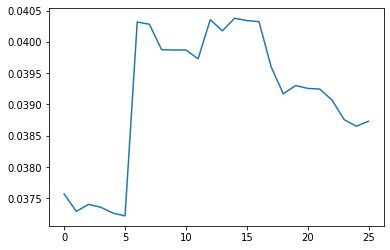

In [44]:
import matplotlib.pyplot as plt

plt.plot(range(len(results[results['name'] == 'pca_values']['MRR'].iloc[1:])), results[results['name'] == 'pca_values']['MRR'].iloc[1:])
plt.show()